# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from preprocessing.pre_for_train import preprocessing_train as pre_train
from sklearn.metrics import accuracy_score

# Load Data

In [3]:
df = pd.read_csv('./news.csv')
df

,date,title,article,interested
0,2018-01-01 00:00:00,레알 베일 현금 토트넘 케인 대형 딜 가능성,홍의택 기자 겨울 이적시장이 문을 연다 대형 거래 가능성도 심심찮게 제기된다...,0
1,2018-01-01 00:00:00,또 일낸 윤정환의 세레소 기어이 컵 더블 달성,윤정환 감독이 이끄는 세레소 오사카가 2017 일왕배 정상에 올랐다 르방컵 에 ...,0
2,2018-01-01 00:00:00,일본에 또 이도류 제의 오타니 등장,투수와 타자를 함께한 오타니 쇼헤이 가 떠난 일본에 또 다른 이도류가 등장했다 ...,1
3,2018-01-01 00:00:00,억 사나이 반 다이크 리버풀 합류 우승 원한다,1083억의 사나이 버질 반 다이크가 리버풀에 공식 합류했다 리버풀은 지난해...,0
4,2018-01-01 00:00:00,년 보장 아닌 년 계약 양현종에게 전화위복,양현종의 1년 계약 오히려 전화위복이 된다 2018년 새해가 밝았지만 아직 계약을...,0
...,...,...,...,...
36225,2022-12-31 00:00:00,병역 기피 논란 석현준 드디어 입 열었다 소속팀서 안 놔줘 정말 오해,석현준 최승섭기자 2년 전 병무청이 발표한 병역기피자명단에 오른 축구국가대표 출...,0
36226,2022-12-31 00:00:00,바르사에서 년 뛴 선수잖아 영입 선택 옳았어,안토니오 콘테 감독이 클레망 랑글레를 칭찬했다 토트넘 훗스퍼는 오는 1월 1일 오후...,0
36227,2022-12-31 00:00:00,위기의 남자 김동엽 박진만 감독은 대행 시절 쓰지 않겠다 고 했다,내가 감독 대행을 하는 동안에는 볼 수 없을 것이다 박진만 삼성 감독이 대행 시...,0
36228,2022-12-31 00:00:00,텐 하흐 이례적 발언 화제 레알 마드리드한테 정말 고맙다,에릭 텐 하흐 맨체스터 유나이티드 감독이 레알 마드리드에 감사 인사를 전한 이유는 ...,0


# Preprocessing

## Split Data

In [4]:
x_train, x_val, y_train, y_val = pre_train(df['title'], df['interested'], split=True)

--------Ratio of Train Data--------
Not Interested = 89.605%
Interested = 10.395%
--------Ratio of Test Data--------
Not Interested = 89.608%
Interested = 10.392%


100%|█████████████████████████████████████████████████████████████████████████████| 7246/7246 [00:15<00:00, 456.80it/s]


In [5]:
df2 = pd.read_csv('./today_news.csv')
df2

,date,title,article,interested,link
0,2023.06.12,토트넘 거절하고 UCL 뛴다더니…그 팀이야?→'제2의 호날두' 깜짝 행보+SON·이...,(엑스포츠뉴스 나승우 기자) 감독과 불화로 첼시로 임대 중인 아틀레티코 마드리드 공...,0,https://sports.news.naver.com/news?oid=311&aid...
1,2023.06.12,"맨유 에이스, 마이애미에서 무슨 일?...새벽 5시에 호텔행 포착 '충격'→'조강지...",[마이데일리 = 김성호 기자]잉글랜드 프리미어 리그 맨체스터 유나이티드 에이스 마커...,0,https://sports.news.naver.com/news?oid=117&aid...
2,2023.06.12,"[오피셜] AS 로마, FA로 아우아르 영입 완료...'2028년까지 5년 계약'",AS로마가 후셈 아우아르(24)를 영입했다.로마는 11일(한국시간) 구단 홈페이지를...,0,https://sports.news.naver.com/news?oid=413&aid...
3,2023.06.12,"포체티노가 인정한 세계 최고 중 한 명…""레알과 영입 경쟁한다""",[스포티비뉴스=이민재 기자] 인터 밀란의 라우타로 마르티네스(25)가 여러 구단의 ...,0,https://sports.news.naver.com/news?oid=477&aid...
4,2023.06.12,"'4이닝 퍼펙트→QS 승리' 대표팀 투수, 왜 ""죄책감 느꼈다"" 했을까","[OSEN=잠실, 한용섭 기자] 두산 투수 곽빈이 11일 만에 복귀전에서 QS 피칭...",1,https://sports.news.naver.com/news?oid=109&aid...
5,2023.06.12,"""뭉클하네요"" 현실이 된 강민호의 예언…삼성 이적 후 처음→14년만의 끝내기포 '손...","[대구=스포츠조선 김영록 기자] ""(딸)하이야! 아빠가 홈런 치고 온다 그랬잖아!""...",0,https://sports.news.naver.com/news?oid=076&aid...
6,2023.06.12,"'임대 대신 완전 이적으로' 맨유 떠난다…""토트넘 제안 없었다""",[스포티비뉴스=이민재 기자] 맨체스터 유나이티드의 해리 매과이어(30)가 올여름 팀...,1,https://sports.news.naver.com/news?oid=477&aid...
7,2023.06.12,"""저는 아이스크림 사 먹을 1600원도 없었습니다""",[마이데일리 = 최용재 기자]잉글랜드 프리미어리그(EPL) 맨체스터 시티가 유럽의 ...,0,https://sports.news.naver.com/news?oid=117&aid...
8,2023.06.12,"‘아! 또 홈런에 당하다니…’ 롯데, 삼성에 연장 10회 끝내기 홈런 4-6 패…2...",삼성 강민호에 10회 끝내기 투런포 허용 4-69회 추격 타점·10회 역전 홈런 불...,1,https://sports.news.naver.com/news?oid=082&aid...
9,2023.06.12,"‘이정후 4안타 6출루+임병욱 3안타 1홈런’ 키움, 18안타 대폭발…KT 잡고 8...","[OSEN=수원, 길준영 기자] 키움 히어로즈가 2연승을 달리며 주말 3연전 위닝시...",0,https://sports.news.naver.com/news?oid=109&aid...


In [6]:
x_test, y_test = pre_train(df2['title'], df2['interested'], split=False)

--------Ratio of Train Data--------
Not Interested = 65.0%
Interested = 35.0%


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 155.89it/s]


In [7]:
x_test.shape

(20, 21)

In [8]:
x_train.shape

(28984, 21)

# Training

In [9]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8866408306903946647
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1734816564
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3517428763334128147
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [10]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['title'])
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
vocab_size

52912

In [12]:
embedding_dim = 128
dropout_prob = (0.5, 0.8) #임베딩 층 이후에는 50% 드롭아웃
num_filters = 128

In [13]:
model_input = Input(shape = (21,)) 
z = Embedding(vocab_size, embedding_dim, input_length = 21, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [14]:
conv_blocks =[]

for sz in [3,4,5]:
    conv = Conv1D(filters = num_filters, 
                  kernel_size = sz,
                  padding = 'valid',
                  activation = 'relu',
                  strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv) #maxpooling
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [15]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['acc'])

In [16]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6, mode='min'),
             tf.keras.callbacks.ModelCheckpoint('./best.h5', monitor='val_loss',save_best_only=True, mode='max')
]

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data = (x_val, y_val), callbacks=callbacks)


Epoch 1/100
453/453 [==============================] - 25s 24ms/step - loss: 0.2924 - acc: 0.9033 - val_loss: 0.4257 - val_acc: 0.8383
Epoch 2/100
453/453 [==============================] - 9s 20ms/step - loss: 0.1761 - acc: 0.9321 - val_loss: 0.4611 - val_acc: 0.8403
Epoch 3/100
453/453 [==============================] - 10s 21ms/step - loss: 0.1390 - acc: 0.9436 - val_loss: 0.5403 - val_acc: 0.8303
Epoch 4/100
453/453 [==============================] - 9s 20ms/step - loss: 0.1147 - acc: 0.9549 - val_loss: 0.6078 - val_acc: 0.8325
Epoch 5/100
453/453 [==============================] - 9s 19ms/step - loss: 0.0965 - acc: 0.9630 - val_loss: 0.6593 - val_acc: 0.8315
Epoch 6/100
453/453 [==============================] - 9s 19ms/step - loss: 0.0795 - acc: 0.9680 - val_loss: 0.7289 - val_acc: 0.8352
Epoch 7/100
453/453 [==============================] - 9s 19ms/step - loss: 0.0670 - acc: 0.9753 - val_loss: 0.8520 - val_acc: 0.8385


## predict

In [17]:
score = model.predict(x_test) # 예측
score.astype('float')
score

1/1 [==============================] - 0s 234ms/step


array([[9.4673318e-01],
       [1.4784439e-01],
       [9.6034348e-01],
       [1.8586652e-05],
       [4.4022314e-02],
       [6.5583956e-01],
       [7.5198501e-01],
       [7.3910892e-01],
       [7.2212063e-04],
       [7.7179080e-01],
       [1.4238965e-03],
       [2.6296383e-01],
       [4.0654950e-02],
       [1.2618062e-01],
       [4.3823658e-03],
       [9.2850253e-03],
       [1.4979957e-02],
       [2.9601023e-02],
       [7.4268961e-03],
       [9.0418005e-01]], dtype=float32)

In [18]:
target = []
for i in score:
    target.append(float(i))

In [19]:
target

[0.9467331767082214,
 0.14784438908100128,
 0.9603434801101685,
 1.8586652004159987e-05,
 0.04402231425046921,
 0.6558395624160767,
 0.7519850134849548,
 0.7391089200973511,
 0.0007221206324175,
 0.7717908024787903,
 0.001423896523192525,
 0.26296383142471313,
 0.040654949843883514,
 0.12618061900138855,
 0.004382365848869085,
 0.009285025298595428,
 0.014979956671595573,
 0.029601022601127625,
 0.007426896132528782,
 0.9041800498962402]

In [20]:
ans = []
for i in y_test:
    if i==0:
        ans.append("부정")
    else:
        ans.append("긍정")

In [21]:
for i in range(len(target)):
    if(target[i] > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(target[i] * 100))
        print("정답 : %s"%ans[i])
        print()
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - target[i]) * 100))
        print("정답 : %s"%ans[i])
        print()

94.67% 확률로 긍정 리뷰입니다.

정답 : 부정

85.22% 확률로 부정 리뷰입니다.

정답 : 부정

96.03% 확률로 긍정 리뷰입니다.

정답 : 부정

100.00% 확률로 부정 리뷰입니다.

정답 : 부정

95.60% 확률로 부정 리뷰입니다.

정답 : 긍정

65.58% 확률로 긍정 리뷰입니다.

정답 : 부정

75.20% 확률로 긍정 리뷰입니다.

정답 : 긍정

73.91% 확률로 긍정 리뷰입니다.

정답 : 부정

99.93% 확률로 부정 리뷰입니다.

정답 : 긍정

77.18% 확률로 긍정 리뷰입니다.

정답 : 부정

99.86% 확률로 부정 리뷰입니다.

정답 : 부정

73.70% 확률로 부정 리뷰입니다.

정답 : 긍정

95.93% 확률로 부정 리뷰입니다.

정답 : 긍정

87.38% 확률로 부정 리뷰입니다.

정답 : 부정

99.56% 확률로 부정 리뷰입니다.

정답 : 긍정

99.07% 확률로 부정 리뷰입니다.

정답 : 부정

98.50% 확률로 부정 리뷰입니다.

정답 : 긍정

97.04% 확률로 부정 리뷰입니다.

정답 : 부정

99.26% 확률로 부정 리뷰입니다.

정답 : 부정

90.42% 확률로 긍정 리뷰입니다.

정답 : 부정



In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 21)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 21, 128)      6772736     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 21, 128)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 19, 128)      49280       ['dropout[0][0]']                
                                                                                              

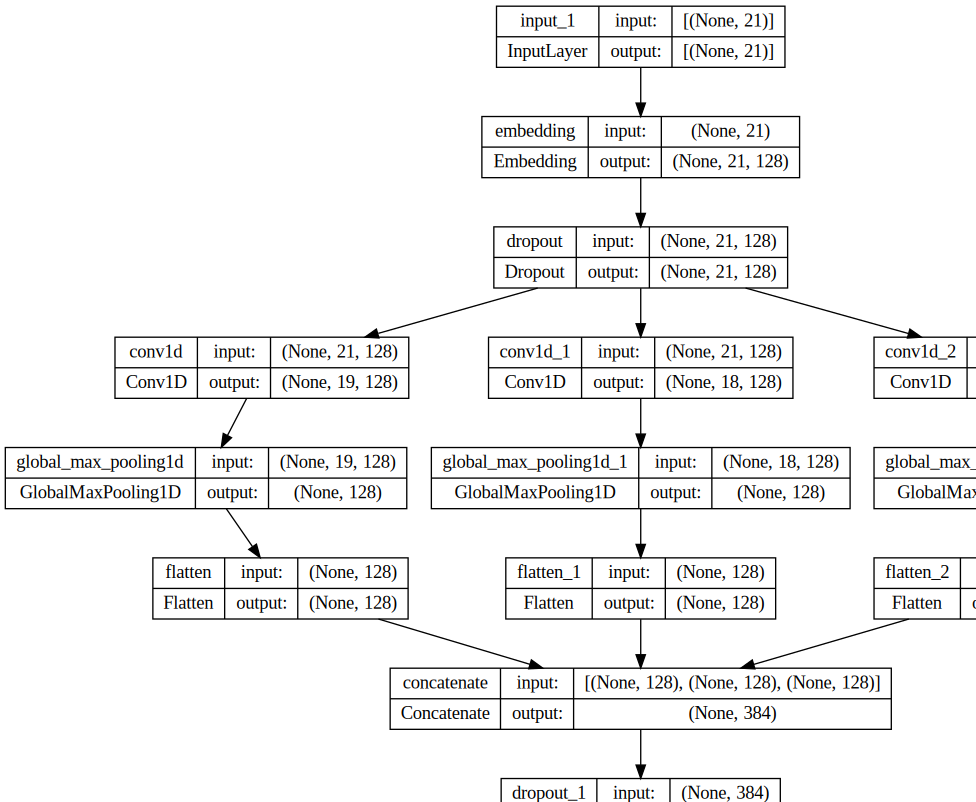

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
from keras.utils.vis_utils import plot_model

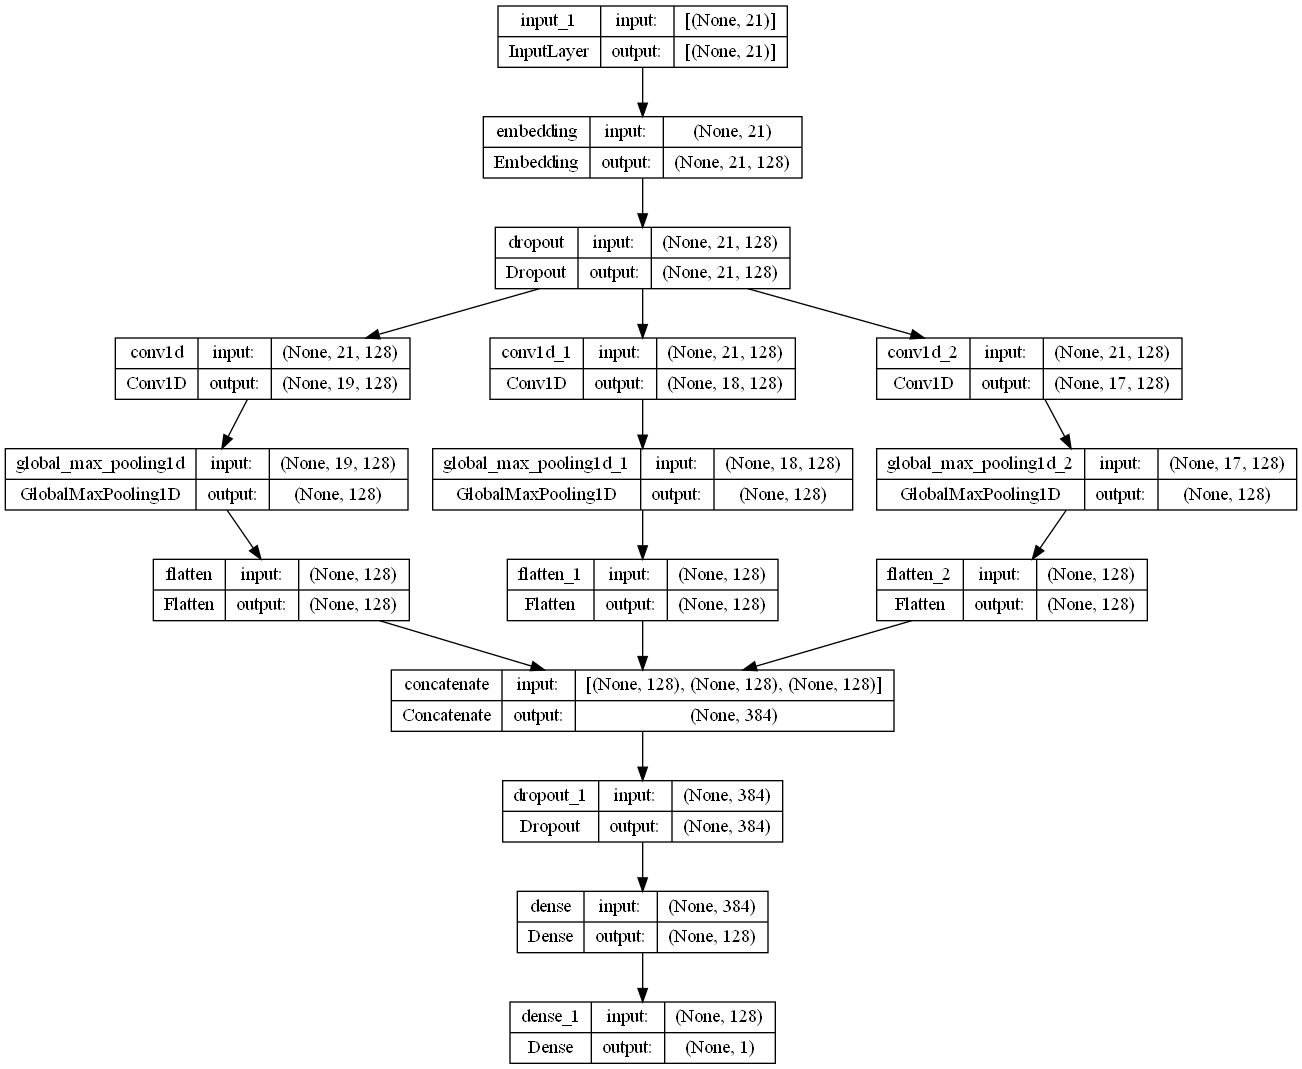

In [25]:
plot_model(model, to_file='test.png',show_shapes=True, show_layer_names=True)